In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()
sns.set_context("notebook")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
dtype_dict = {
    'Date': 'str',
    'FarmName_Pseudo': 'str',
    'SE_Number': 'str',
    'Age': 'Int64',
    'DailyYield': 'float',
    'PreviousDailyYield': 'float',
    'DailyYieldChange': 'float',
    'DaysInMilk': 'Int64',
    'YearSeason': 'str',
    'LactationNumber': 'Int64',
    'ExpectedYield': 'float',
    'NormalizedDailyYield': 'float',
    'NormalizedDailyYieldChange': 'float',
    'HeatStress': 'Int64',
    'Temp15Threshold': 'Int64',
    'HW': 'Int64',
    'cum_HW': 'Int64',
    'MeanTemperature': 'float',
    'MeanTHI_adj': 'float'
}

milk_data = pd.read_csv('../Data/MergedData/MilkApproachYieldData.csv', dtype=dtype_dict)
milk_data['Date'] = pd.to_datetime(milk_data['Date'], format='%Y-%m-%d')
milk_data.head(-5)

,Date,FarmName_Pseudo,SE_Number,Age,LactationNumber,DaysInMilk,DailyYield,PreviousDailyYield,DailyYieldChange,ExpectedYield,NormalizedDailyYield,NormalizedDailyYieldChange,HeatStress,Temp15Threshold,HW,cum_HW,MeanTemperature,MeanTHI_adj
0,2022-01-01,a624fb9a,SE-064c0cec-1189,3095,7,191,30.77,0.00,0.00,29.759508,1.033955,0.000000,0,0,0,0,-3.025000,28.012944
1,2022-01-02,a624fb9a,SE-064c0cec-1189,3096,7,192,48.22,30.77,17.45,29.712387,1.622892,0.587297,0,0,0,0,-0.279167,32.898193
2,2022-01-03,a624fb9a,SE-064c0cec-1189,3097,7,193,30.53,48.22,-17.69,29.665277,1.029149,-0.596320,0,0,0,0,2.033333,36.760487
3,2022-01-04,a624fb9a,SE-064c0cec-1189,3098,7,194,42.26,30.53,11.73,29.618178,1.426826,0.396041,0,0,0,0,0.066667,31.939524
4,2022-01-05,a624fb9a,SE-064c0cec-1189,3099,7,195,38.49,42.26,-3.77,29.571090,1.301609,-0.127489,0,0,0,0,-3.700000,26.498206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474028,2023-06-04,f454e660,SE-fcdf259d-0044-0,4151,10,348,22.31,12.67,9.64,11.927497,1.870468,0.808217,0,1,0,0,13.079167,56.726870
474029,2023-06-05,f454e660,SE-fcdf259d-0044-0,4152,10,349,12.84,22.31,-9.47,11.866282,1.082058,-0.798060,0,1,0,0,14.237500,58.482418
474030,2023-06-06,f454e660,SE-fcdf259d-0044-0,4153,10,350,9.47,12.84,-3.37,11.805349,0.802179,-0.285464,0,1,0,0,15.345833,60.546358
474031,2023-06-07,f454e660,SE-fcdf259d-0044-0,4154,10,351,10.92,9.47,1.45,11.744694,0.929782,0.123460,0,1,0,0,15.645833,61.559237


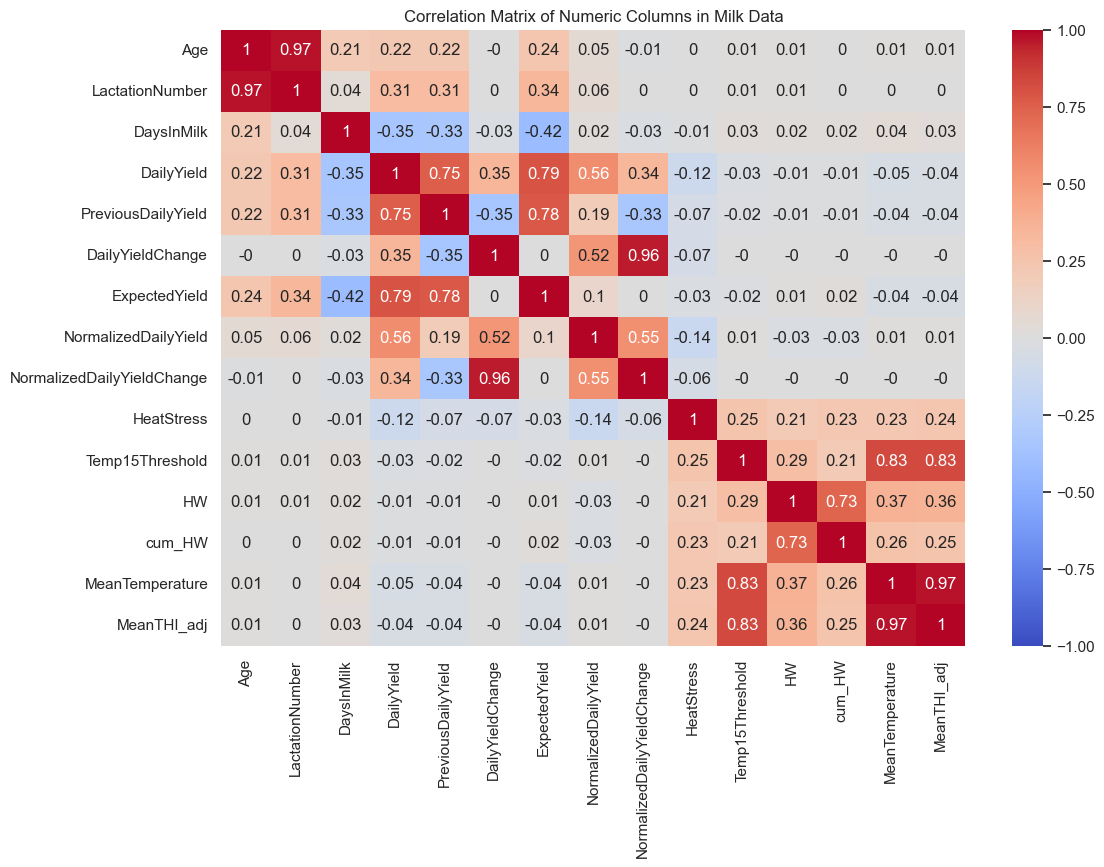

In [23]:
# Filter out only numeric columns
numeric_cols = milk_data.select_dtypes(include=['float64', 'int64']).columns
milk_data_numeric = milk_data[numeric_cols]

# Calculate the correlation matrix
corr_matrix = milk_data_numeric.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix.round(2), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Columns in Milk Data')
plt.show()

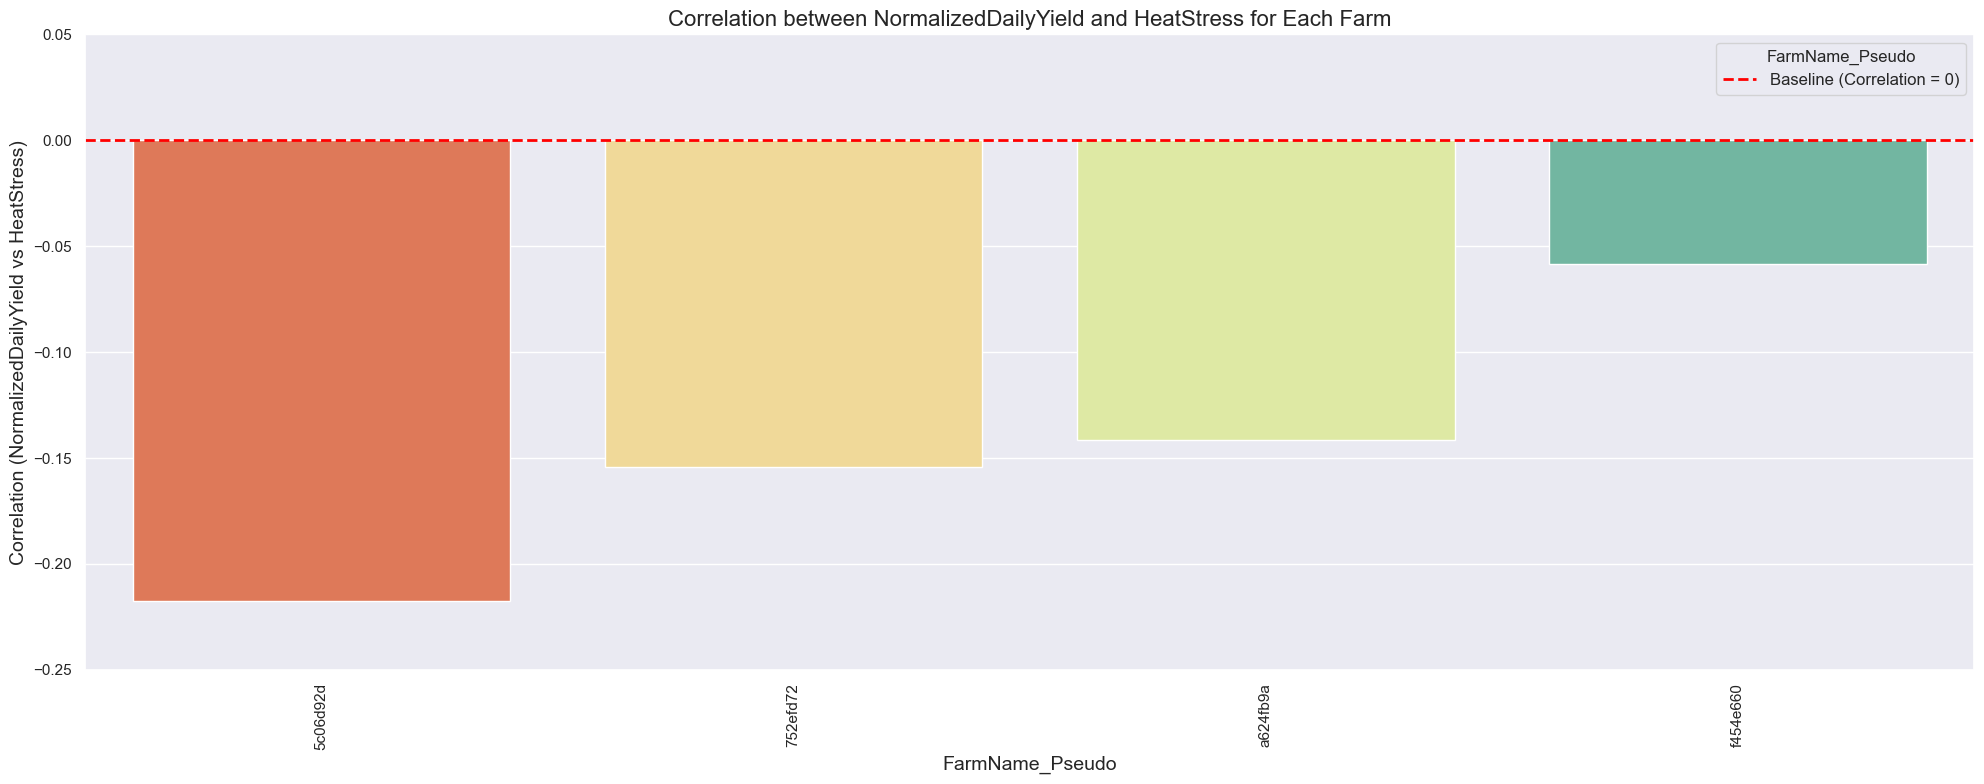

In [24]:
# Calculate correlation manually
grouped = milk_data.groupby('FarmName_Pseudo')
correlations = pd.DataFrame({
    'FarmName_Pseudo': list(grouped.groups.keys()),
    'Correlation': [grouped.get_group(name)[['NormalizedDailyYield', 'HeatStress']].corr().iloc[0, 1] for name in grouped.groups.keys()]
})

# Plotting
plt.figure(figsize=(20, 8))  # Adjust the figure size to zoom out a bit
barplot = sns.barplot(x='FarmName_Pseudo', y='Correlation', data=correlations, palette='Spectral', hue='FarmName_Pseudo', dodge=False, errorbar=None)

# Add baseline line
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Baseline (Correlation = 0)')

# Formatting the plot
plt.xlabel('FarmName_Pseudo', fontsize=14)
plt.ylabel('Correlation (NormalizedDailyYield vs HeatStress)', fontsize=14)
plt.title('Correlation between NormalizedDailyYield and HeatStress for Each Farm', fontsize=16)

plt.ylim(-0.25, 0.05)  # Adjust y-axis limits to show some area above 0
plt.xticks(rotation=90)
plt.legend(fontsize=12, loc='upper right', title='FarmName_Pseudo')
plt.tight_layout()
plt.show()

In [25]:
# Output the correlation values in a nice table format
correlation_table = correlations.sort_values(by='Correlation', ascending=False)
print("\nCorrelation values between NormalizedDailyYield and HeatStress for each Farm:")
print(correlation_table.to_string(index=False))


Correlation values between NormalizedDailyYield and HeatStress for each Farm:
FarmName_Pseudo  Correlation
       f454e660    -0.058380
       a624fb9a    -0.141324
       752efd72    -0.154414
       5c06d92d    -0.217265
